## Import Packages and Source Code

In [1]:
import json
import os

In [2]:
## Import Source Code ##
from src.data import make_dataset
from src.features import build_features
from src.models import train_model
from src.visualization import visualize

In [3]:
## Creating paths to store temp and out data ##
if not os.path.exists("data/temp"):
    os.makedirs("data/temp")
if not os.path.exists("data/out"):
    os.makedirs("data/out")

In [4]:
## Used to format graph
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

## Reading Data

In [5]:
## Obtaining file paths
with open("config/data-params.json") as fh:
    file_paths = json.load(fh)
            
metadata_table, tcga_abbrev, high_coverage_feature, wis_intersect_feature, decontaminated_feature = make_dataset.read_fungi_data(**file_paths)

In [6]:
metadata_table

,sample_name,run_prefix,experimental_strategy,cgc_base_name,filename,analyte_amount,analyte_A260A280Ratio,aliquot_concentration,cgc_id,cgc_filename,...,data_submitting_center_label,tissue_source_site_label,country_of_sample_procurement,portion_is_ffpe,pathologic_t_label,pathologic_n_label,histological_diagnosis_label,pathologic_stage_label,PlateCenter,PlateCenterFlag
sampleid,,,,,,,,,,,,,,,,,,,,,
13722.58cfa82fe4b0c9d6adf6b62c,58cfa82fe4b0c9d6adf6b62c,TCGA-50-5941-01A-11D-1751_111007_SN590_0110_C0...,WGS,TCGA-50-5941-01A-11D-1751_111007_SN590_0110_C0...,TCGA-50-5941-01A-11D-1751_111007_SN590_0110_C0...,237.40,1.90,0.16,58cfa82fe4b0c9d6adf6b62c,TCGA-50-5941-01A-11D-1751_111007_SN590_0110_C0...,...,Harvard Medical School,University of Pittsburgh,United States,NO,T2a,N2,Lung Adenocarcinoma- Not Otherwise Specified (...,Stage IIIA,1751-02,True
13722.58cfa82fe4b0c9d6adf6b5e0,58cfa82fe4b0c9d6adf6b5e0,TCGA-50-5941-10A-01D-1751_111007_SN590_0110_C0...,WGS,TCGA-50-5941-10A-01D-1751_111007_SN590_0110_C0...,TCGA-50-5941-10A-01D-1751_111007_SN590_0110_C0...,30.70,1.90,0.16,58cfa82fe4b0c9d6adf6b5e0,TCGA-50-5941-10A-01D-1751_111007_SN590_0110_C0...,...,Harvard Medical School,University of Pittsburgh,United States,NO,T2a,N2,Lung Adenocarcinoma- Not Otherwise Specified (...,Stage IIIA,1751-02,True
13722.58cfa82ee4b0c9d6adf6af8e,58cfa82ee4b0c9d6adf6af8e,TCGA-05-4405-10A-01D-1853_111204_SN208_0256_C0...,WGS,TCGA-05-4405-10A-01D-1853_111204_SN208_0256_C0...,TCGA-05-4405-10A-01D-1853_111204_SN208_0256_C0...,43.00,1.90,0.14,58cfa82ee4b0c9d6adf6af8e,TCGA-05-4405-10A-01D-1853_111204_SN208_0256_C0...,...,Harvard Medical School,Indivumed,Germany,NO,T2,N0,Lung Adenocarcinoma Mixed Subtype,Stage IB,1853-02,True
13722.58cfa82ee4b0c9d6adf6af20,58cfa82ee4b0c9d6adf6af20,TCGA-05-4415-01A-22D-1853_111204_SN208_0256_C0...,WGS,TCGA-05-4415-01A-22D-1853_111204_SN208_0256_C0...,TCGA-05-4415-01A-22D-1853_111204_SN208_0256_C0...,143.70,1.90,0.14,58cfa82ee4b0c9d6adf6af20,TCGA-05-4415-01A-22D-1853_111204_SN208_0256_C0...,...,Harvard Medical School,Indivumed,Germany,NO,T4,N2,Lung Adenocarcinoma Mixed Subtype,Stage IIIB,1853-02,True
13722.58cfa82fe4b0c9d6adf6b669,58cfa82fe4b0c9d6adf6b669,TCGA-44-6775-11A-01D-1853_111207_SN590_0112_D0...,WGS,TCGA-44-6775-11A-01D-1853_111207_SN590_0112_D0...,TCGA-44-6775-11A-01D-1853_111207_SN590_0112_D0...,16.70,1.90,0.14,58cfa82fe4b0c9d6adf6b669,TCGA-44-6775-11A-01D-1853_111207_SN590_0112_D0...,...,Harvard Medical School,Christiana Healthcare,United States,NO,T2a,N0,Lung Adenocarcinoma- Not Otherwise Specified (...,Stage IB,1853-02,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13722.58cfa832e4b0c9d6adf6ceda,58cfa832e4b0c9d6adf6ceda,TCGA-EJ-5505-01A-01D-1572_130315_SN590_0220_BD...,WGS,TCGA-EJ-5505-01A-01D-1572_130315_SN590_0220_BD...,TCGA-EJ-5505-01A-01D-1572_130315_SN590_0220_BD...,164.70,1.90,0.14,58cfa832e4b0c9d6adf6ceda,TCGA-EJ-5505-01A-01D-1572_130315_SN590_0220_BD...,...,Harvard Medical School,University of Pittsburgh,United States,NO,T2c,N0,Prostate Adenocarcinoma Acinar Type,Not available,1572-02,True
13722.58cfa832e4b0c9d6adf6cedd,58cfa832e4b0c9d6adf6cedd,TCGA-EJ-5508-01A-02D-1572_130308_SN590_0219_BC...,WGS,TCGA-EJ-5508-01A-02D-1572_130308_SN590_0219_BC...,TCGA-EJ-5508-01A-02D-1572_130308_SN590_0219_BC...,256.70,1.90,0.15,58cfa832e4b0c9d6adf6cedd,TCGA-EJ-5508-01A-02D-1572_130308_SN590_0219_BC...,...,Harvard Medical School,University of Pittsburgh,United States,NO,T3a,N0,Prostate Adenocarcinoma Acinar Type,Not available,1572-02,True
13722.58cfa831e4b0c9d6adf6cc9a,58cfa831e4b0c9d6adf6cc9a,TCGA-EE-A2MI-10A-01D-A190_120724_SN208_0418_BD...,WGS,TCGA-EE-A2MI-10A-01D-A190_120724_SN208_0418_BD...,TCGA-EE-A2MI-10A-01D-A190_120724_SN208_0418_BD...,26.57,NaN,0.15,58cfa831e4b0c9d6adf6cc9a,TCGA-EE-A2MI-10A-01D-A190_120724_SN208_0418_BD...,...,Harvard Medical School,University of Sydney,Australia,NO,T4,N0,Not available,Stage IIB,A190-02,True


In [7]:
print(tcga_abbrev.shape)
tcga_abbrev.head()

(32, 1)


,abbrev
dz,
Adrenocortical Carcinoma,ACC
Bladder Urothelial Carcinoma,BLCA
Brain Lower Grade Glioma,LGG
Breast Invasive Carcinoma,BRCA
Cervical Squamous Cell Carcinoma and Endocervical Adenocarcinoma,CESC


In [8]:
high_coverage_feature

,G000002515,G000002545,G000003855,G000006335,G000006445,G000026945,G000091025,G000146045,G000149425,G000149645,...,G001298625,G001417885,G001642055,G001661405,G002079055,G002775015,G003290485,G004154835,G004353045,G900007375
sampleid,,,,,,,,,,,,,,,,,,,,,
13722.58cfa82fe4b0c9d6adf6b62c,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,4,0
13722.58cfa82fe4b0c9d6adf6b5e0,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,2,0,8,0
13722.58cfa82ee4b0c9d6adf6af8e,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,2,5,0,11,0
13722.58cfa82ee4b0c9d6adf6af20,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,1,1,0
13722.58cfa82fe4b0c9d6adf6b669,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13722.58cfa832e4b0c9d6adf6ceda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
13722.58cfa832e4b0c9d6adf6cedd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13722.58cfa831e4b0c9d6adf6cc9a,0,0,3,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,1,1,1


In [9]:
print(wis_intersect_feature.shape)
wis_intersect_feature.head()

(1986, 34)


,Candida_glabrata,Candida_tropicalis,Debaryomyces_hansenii,Schizophyllum_commune,Saccharomyces_cerevisiae,Fusarium_oxysporum,Pyrenophora_tritici-repentis,Malassezia_globosa,Candida_albicans,Torulaspora_delbrueckii,...,Pneumocystis_jirovecii,Alternaria_alternata,Wickerhamomyces_anomalus,Hyphopichia_burtonii,Cyberlindnera_jadinii,Tilletiopsis_washingtonensis,Malassezia_restricta,Byssochlamys_spectabilis,Sporisorium_graminicola,Ramularia_collo-cygni
sampleid,,,,,,,,,,,,,,,,,,,,,
13722.58cfa82fe4b0c9d6adf6b62c,0,0,0,0,0,0,0,12517,0,0,...,0,0,0,0,0,1,2,0,0,4
13722.58cfa82fe4b0c9d6adf6b5e0,0,0,2,0,0,4,0,13251,0,0,...,0,0,0,0,0,0,2,1,0,2
13722.58cfa82ee4b0c9d6adf6af8e,0,0,0,0,0,0,0,12764,1,0,...,0,0,0,0,0,0,5,0,0,977
13722.58cfa82ee4b0c9d6adf6af20,0,0,0,0,0,0,0,17941,0,0,...,0,0,0,0,0,0,3,2,1,182
13722.58cfa82fe4b0c9d6adf6b669,0,0,0,0,0,0,0,20467,1,0,...,0,0,0,0,0,0,1,0,0,6


In [10]:
print(decontaminated_feature.shape)
decontaminated_feature.head()

(1986, 224)


,G000001985,G000002515,G000002525,G000002545,G000002655,G000002715,G000002855,G000002945,G000003125,G000003515,...,G009193645,G010015585,G010093625,G010724455,G011692745,G900007375,G900067095,G900074925,G900079805,G000277815
sampleid,,,,,,,,,,,,,,,,,,,,,
13722.58cfa82fe4b0c9d6adf6b62c,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,4,0,0
13722.58cfa82fe4b0c9d6adf6b5e0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,2,0,0
13722.58cfa82ee4b0c9d6adf6af8e,1,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,977,0,0
13722.58cfa82ee4b0c9d6adf6af20,0,0,0,0,2,2,0,0,0,0,...,5,0,0,0,0,0,0,182,0,0
13722.58cfa82fe4b0c9d6adf6b669,0,0,0,0,1,1,0,0,0,0,...,2,0,0,0,0,0,0,6,0,0


In [11]:
datasets = (high_coverage_feature, wis_intersect_feature, decontaminated_feature)

## Create Features

In [12]:
with open("config/feature-params.json") as fh:
    feature_params = json.load(fh)
# Filter Metadata based on sample_type            
filtered_metadata = build_features.filter_sample_type(metadata_table, **feature_params)
filtered_metadata

,disease_type,sample_type
sampleid,,
13722.58cfa82fe4b0c9d6adf6b62c,Lung Adenocarcinoma,Primary Tumor
13722.58cfa82ee4b0c9d6adf6af20,Lung Adenocarcinoma,Primary Tumor
13722.58cfa82fe4b0c9d6adf6b6d8,Lung Adenocarcinoma,Primary Tumor
13722.58cfa82fe4b0c9d6adf6b648,Lung Adenocarcinoma,Primary Tumor
13722.58cfa82fe4b0c9d6adf6b60d,Lung Adenocarcinoma,Primary Tumor
...,...,...
13722.58cfa831e4b0c9d6adf6ca0c,Bladder Urothelial Carcinoma,Primary Tumor
13722.58cfa831e4b0c9d6adf6ca56,Brain Lower Grade Glioma,Primary Tumor
13722.58cfa831e4b0c9d6adf6cc92,Prostate Adenocarcinoma,Primary Tumor


### Using the filtered_metadata sampleid's filter the three datasets 

In [13]:
# Features - X (three datasets held in a map)
filtered_feature_tables = build_features.relevant_feature_table_samples(filtered_metadata, datasets)
# High Coverage - Filtered Feature Table
list(build_features.relevant_feature_table_samples(filtered_metadata, datasets))[0][0]

,G000002515,G000002545,G000003855,G000006335,G000006445,G000026945,G000091025,G000146045,G000149425,G000149645,...,G001298625,G001417885,G001642055,G001661405,G002079055,G002775015,G003290485,G004154835,G004353045,G900007375
sampleid,,,,,,,,,,,,,,,,,,,,,
13722.58cfa82fe4b0c9d6adf6b62c,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,4,0
13722.58cfa82ee4b0c9d6adf6af20,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,1,1,0
13722.58cfa82fe4b0c9d6adf6b6d8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2,0
13722.58cfa82fe4b0c9d6adf6b648,0,0,0,0,0,0,0,7,0,0,...,0,0,0,0,1,0,2,2,30,1
13722.58cfa82fe4b0c9d6adf6b60d,0,0,1,0,0,0,0,10,0,0,...,0,1,0,0,0,0,22,1,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13722.58cfa831e4b0c9d6adf6ca0c,0,0,2,0,0,0,0,0,0,0,...,0,0,0,2,0,0,4,7,2,0
13722.58cfa831e4b0c9d6adf6ca56,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13722.58cfa831e4b0c9d6adf6cc92,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8,0,0,0


### Created One-Hot Encoded disease_type dataframe to use as target for machine learning model

In [14]:
# Target - Y
disease_types = build_features.disease_type_count(filtered_metadata)
disease_types

,Bladder Urothelial Carcinoma,Brain Lower Grade Glioma,Colon Adenocarcinoma,Head and Neck Squamous Cell Carcinoma,Lung Adenocarcinoma,Prostate Adenocarcinoma,Rectum Adenocarcinoma,Stomach Adenocarcinoma,Thyroid Carcinoma,Uterine Corpus Endometrial Carcinoma
sampleid,,,,,,,,,,
13722.58cfa82fe4b0c9d6adf6b62c,0,0,0,0,1,0,0,0,0,0
13722.58cfa82ee4b0c9d6adf6af20,0,0,0,0,1,0,0,0,0,0
13722.58cfa82fe4b0c9d6adf6b6d8,0,0,0,0,1,0,0,0,0,0
13722.58cfa82fe4b0c9d6adf6b648,0,0,0,0,1,0,0,0,0,0
13722.58cfa82fe4b0c9d6adf6b60d,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
13722.58cfa831e4b0c9d6adf6ca0c,1,0,0,0,0,0,0,0,0,0
13722.58cfa831e4b0c9d6adf6ca56,0,1,0,0,0,0,0,0,0,0
13722.58cfa831e4b0c9d6adf6cc92,0,0,0,0,0,1,0,0,0,0


## Machine Learning Model - Gradient Boosting Classifier with StratifiedKFold Validation

In [15]:
## Read config files to obtain model parameters ##
with open("config/gbc-model-params.json") as fh:
    gbc_model_params = json.load(fh)
        
with open("config/skf-model-params.json") as fh:
    skf_params = json.load(fh)

In [16]:
# dict to store plot data
plot_data = {}
# loop through datasets
for dataset, dataset_name in filtered_feature_tables:
    # Initialize GBC Model
    gbc_model = train_model.init_gbc_model(**gbc_model_params)
    # Initialize stratified k fold validation
    skf = train_model.init_skf(**skf_params)
    # Obtain auroc and aupr scores
    auroc_scores, aupr_scores = train_model.model_predict(dataset, disease_types, gbc_model, skf)
    # Save scores in plot_data - stored as {dataset_name: (auroc_scores, aupr_scores)}
    plot_data[dataset_name] = (auroc_scores, aupr_scores)

In [17]:
# save plot_data
plot_data_path = visualize.save_plot_data(plot_data)

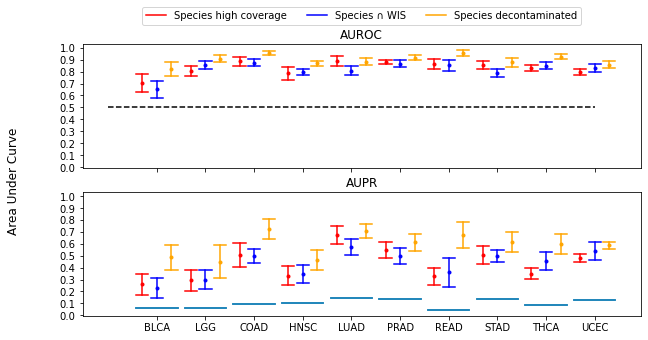

In [18]:
# create visualization
visualize.plot_model_metrics(plot_data_path, disease_types, tcga_abbrev,['Species high coverage','Species ∩ WIS','Species decontaminated'])